# Data Cleaning and Integrity in NYC lettuce_dataset Dataset
This notebook demonstrates data cleaning operations such as handling missing data, removing duplicates, standardizing data, and detecting outliers.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = r'C:\Users\user\Downloads\oasis\lettuce_dataset.csv'
data = data = pd.read_csv(file_path, encoding='ISO-8859-1')
# or use latin1
# data = pd.read_csv(file_path, encoding='latin1')


# Display basic info and first few rows of the dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Plant_ID          3169 non-null   int64  
 1   Date              3169 non-null   object 
 2   Temperature (°C)  3169 non-null   float64
 3   Humidity (%)      3169 non-null   int64  
 4   TDS Value (ppm)   3169 non-null   int64  
 5   pH Level          3169 non-null   float64
 6   Growth Days       3169 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 173.4+ KB


,Plant_ID,Date,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
0,1,8/3/2023,33.4,53,582,6.4,1
1,1,8/4/2023,33.5,53,451,6.1,2
2,1,8/5/2023,33.4,59,678,6.4,3
3,1,8/6/2023,33.4,68,420,6.4,4
4,1,8/7/2023,33.4,74,637,6.5,5


## Step 1: Handling Missing Data

In [12]:
# 1. Handling Missing Values (if any)
# Since no missing values are present, this step can be skipped.
# However, for future-proofing, here's how you would handle it:
#data.fillna(data.mean(), inplace=True)

# Verify missing values have been handled
data.isnull().sum()

Plant_ID            0
Date                0
Temperature (°C)    0
Humidity (%)        0
TDS Value (ppm)     0
pH Level            0
Growth Days         0
dtype: int64

## Step 2: Removing Duplicates

In [13]:
# Drop duplicate rows if any
data.drop_duplicates(inplace=True)

# Verify that duplicates are removed
data.duplicated().sum()

np.int64(0)

## Step 3: Standardizing Data

In [14]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Display the head to verify standardization
data.head()

,Plant_ID,Date,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
0,-1.701649,8/3/2023,1.125915,-1.321099,-0.138688,0.003366,-1.693530
1,-1.701649,8/4/2023,1.147329,-1.321099,-1.270977,-1.276599,-1.617038
2,-1.701649,8/5/2023,1.125915,-0.653510,0.691082,0.003366,-1.540547
3,-1.701649,8/6/2023,1.125915,0.347874,-1.538924,0.003366,-1.464055
4,-1.701649,8/7/2023,1.125915,1.015463,0.336701,0.430021,-1.387564


## Step 4: Outlier Detection using IQR

In [17]:
outliers = pd.DataFrame()
for col in numeric_columns:
    outliers[col] = np.abs(data[col]) > 3  # Marks True for outliers

# Display rows with outliers
outlier_rows = data[outliers.any(axis=1)]
print(f"Outlier Rows:\n{outlier_rows}")

Outlier Rows:
Empty DataFrame
Columns: [Plant_ID, Date, Temperature (°C), Humidity (%), TDS Value (ppm), pH Level, Growth Days]
Index: []


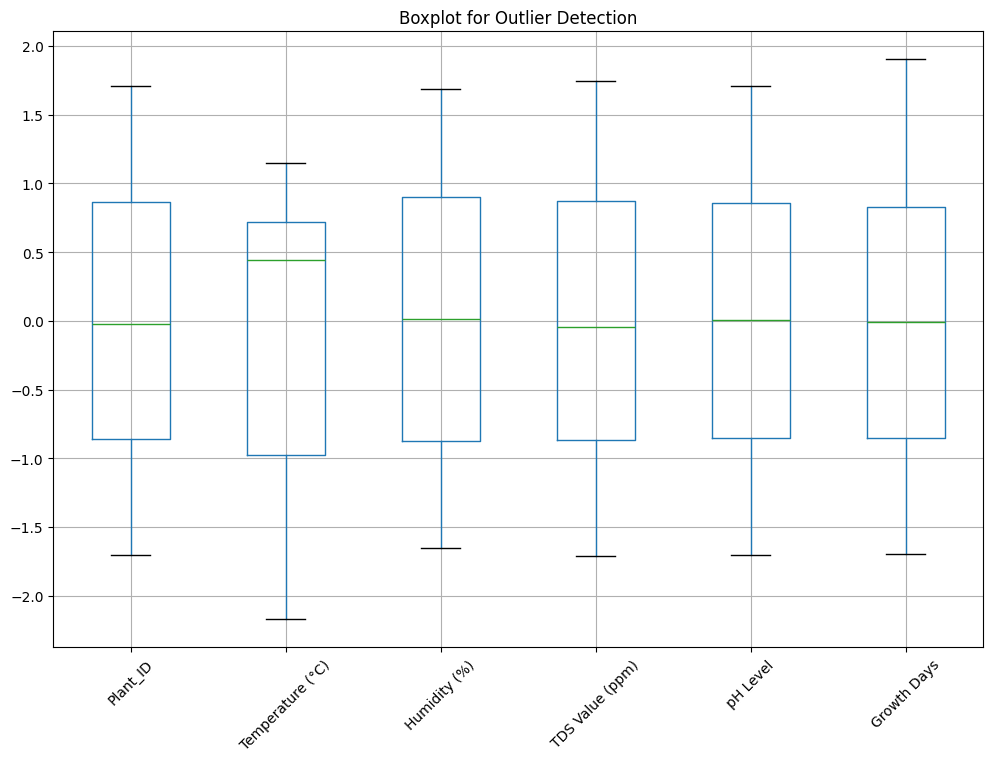

In [19]:
plt.figure(figsize=(12, 8))

# Ensure column names are passed correctly
data.boxplot(column=list(numeric_columns))
plt.xticks(rotation=45)
plt.title('Boxplot for Outlier Detection')
plt.show()